In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
import warnings
import seaborn as sns
import matplotlib.cm as cm
from pylab import savefig
warnings.filterwarnings("ignore")
pd.options.display.mpl_style = 'default'
sns.set(style="white", color_codes=True)

In [2]:
data = pd.read_csv('ratings_sample.tsv', sep = '\t')

In [61]:
class Viz():
    '''
    based on pandas and seaborn: http://seaborn.pydata.org/tutorial/categorical.html
    '''
    def __init__(self, dataframe):
        self.df = dataframe
        
    def scatterplot(self, x, y, size = 5, mode = None):
        if mode == 'categorical':
            sns.stripplot(x = x, y = y, data = self.df, size = size, jitter = True)
            
        elif mode == 'joint':
            sns.jointplot(x = x, y = y, data=self.df, size = size)
            
        else:
            self.df.plot(kind = 'scatter', x = x, y = y)
        
        
    def jointplot(self, x, y, size = 5, kind = 'scatter'):
        sns.jointplot(x = x, y = y, data = self.df, size = size, kind = kind)
        
    def facetgrid(self, x, y, color_column = None, size = 5, legend = True):
        if color_column == None:
            if legend == True:
                sns.FacetGrid(self.df, size = size).map(plt.scatter, x, y).add_legend()

            elif legend == False:
                sns.FacetGrid(self.df, size = size).map(plt.scatter, x, y)

            else:
                print 'Legend should be True or False.'
        else:
            if legend == True:
                sns.FacetGrid(self.df, hue = color_column, size = size).map(plt.scatter, x, y).add_legend()

            elif legend == False:
                sns.FacetGrid(self.df, hue = color_column, size = size).map(plt.scatter, x, y)

            else:
                print 'Legend should be True or False.'
            
    def pairplot(self, columns, color_column = None, size = 5, diag_kind = 'hist', kind = 'scatter'):
        if color_column == None:
            sns.pairplot(data.ix[:,columns], size = size, diag_kind = diag_kind, kind = kind)
        else:    
            sns.pairplot(data.ix[:,columns], hue = color_column, size = size, diag_kind = diag_kind, kind = kind)
        
    def boxplot(self, x, y, orient = 'h'):
        sns.boxplot(x = x, y = y, data = self.df, orient = orient)    
        
    def boxplot_all(self, orient = 'h'):
        sns.boxplot(data = self.df, orient = orient)
        
    def histogram(self):
        self.df.hist()
        
    def barplot(self, x, y, color_column = None):
        if color_column == None:
            sns.barplot(x = x, y = y, data = self.df)
        else:
            sns.barplot(x = x, y = y, hue = color_column, data = self.df)
        
    def countplot(self, column, orient = 'v'):
        if orient == 'v':
            sns.countplot(x = column, data=self.df)
        elif orient == 'h':
            sns.countplot(y = column, data=self.df)
        else:
            print 'Orient should be h(horizontal) or v(vertical)'
            
    def bubble(self, x, y, size_column):
        N = len(self.df[str(size_column)].unique())
        colors=cm.rainbow(np.random.rand(N))
        fig = plt.figure()
        ax = fig.add_subplot(1,1,1)
        ax.scatter(x = self.df[str(x)], y = self.df[str(y)], s = self.df[str(size_column)], color = colors)
        plt.show()
            
        
            

In [58]:
a = Viz(data)

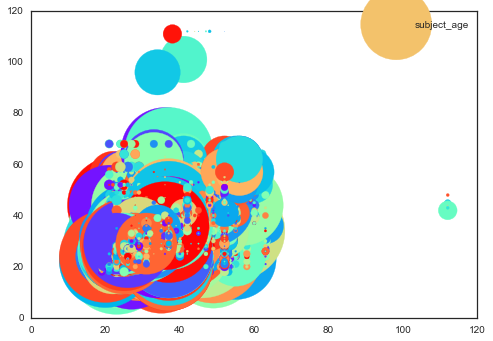

In [60]:
a.bubble('player_age','subject_age', 'distance')